<a href="https://colab.research.google.com/github/MATHSMADHA/Unlocking-Paddy-Heritage-Deep-Learning-for-Feature-Extraction-and-Recognition/blob/main/RGBTOBN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Image Conversion

In [ ]:
from PIL import Image
import numpy as np

In [ ]:

# Read Image
img= Image.open('/content/Karunkuruvai.JPG')



In [ ]:
# Convert Image to Numpy as array
img = np.array(img)


In [ ]:
# Put threshold to make it binary
binarr = np.where(img>128, 255, 0)


In [ ]:
# Covert numpy array back to image
binimg = Image.fromarray(binarr)

In [ ]:
import numpy as np
from PIL import Image as im
data = im.fromarray(binarr, mode="RGB")

In [ ]:
data.save('gfg_dummy_pic.jpeg')

Gray Scale image

In [ ]:
from PIL import Image
img = Image.open('/content/im1.jpeg').convert('L')
img.save('/content/graim1.jpeg')

Three Images

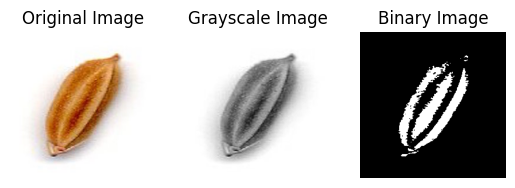

In [ ]:
# import required libraries
import cv2
import matplotlib.pyplot as plt

# load the input image
img = cv2.imread('/content/P1.jpg')

# convert the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding to convert grayscale to binary image
ret,thresh = cv2.threshold(gray,128,255,1)

# convert BGR to RGB to display using matplotlib
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display Original, Grayscale and Binary Images
plt.subplot(131),plt.imshow(imgRGB,cmap = 'gray'),plt.title('Original Image'), plt.axis('off')
plt.subplot(132),plt.imshow(gray,cmap = 'gray'),plt.title('Grayscale Image'),plt.axis('off')
plt.subplot(133),plt.imshow(thresh,cmap = 'gray'),plt.title('Binary Image'),plt.axis('off')
plt.show()

In [ ]:
plt.imshow(thresh,cmap = 'gray')

BACK GROUND REMOVAL

In [ ]:
import cv2
import numpy as np

# load image
img = cv2.imread('/content/im1.jpeg')

# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image as mask
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# negate mask
mask = 255 - mask

# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask -- blur then stretch
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('person_transp_bckgrnd.jpeg', result)

# display result, though it won't show transparency
cv2.imshow("INPUT", img)
cv2.imshow("GRAY", gray)
cv2.imshow("MASK", mask)
cv2.imshow("RESULT", result)
cv2.waitKey(0)
cv2.destroyAllWindows()